# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
data = pd.read_csv('real_estate_data.csv', sep='\t')
data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [9]:
data.duplicated().sum()

0

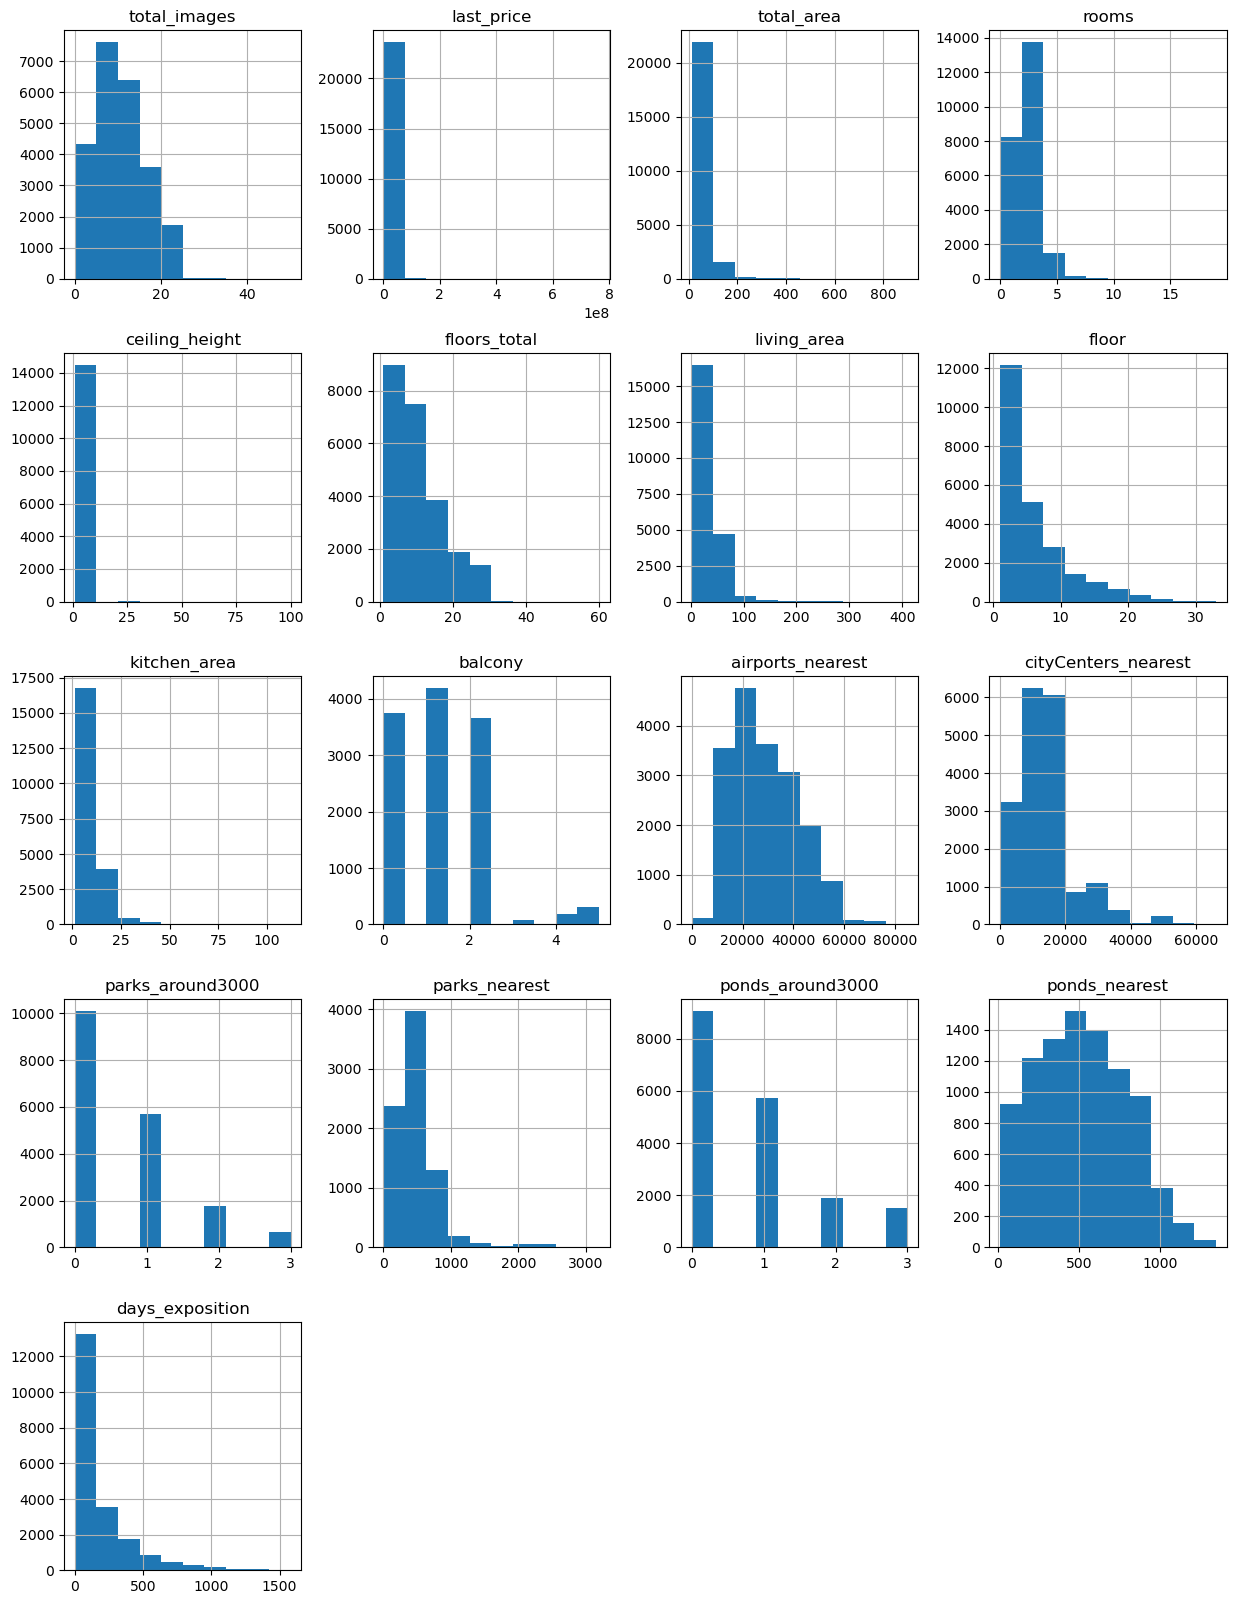

In [10]:
data.hist(figsize=(15, 20))

plt.show()

### Предобработка данных

In [11]:
data = data.rename(columns={'parks_around3000': 'parks_around_3000'})
data = data.rename(columns={'ponds_around3000': 'ponds_around_3000'})
data = data.rename(columns={'cityCenters_nearest': 'city_centers_nearest'})
data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


**2.1. Поиск пропущенных значений в столбцах**

In [12]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around_3000        5518
parks_nearest           15620
ponds_around_3000        5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [13]:
data['balcony']=data['balcony'].fillna(0)
data.head(5)
#замена NaN на 0 в столбце balcony

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [14]:

data['ceiling_height'].describe()
data.groupby('ceiling_height')['floor'].sum()
ceiling_height_median = data['ceiling_height'].median()
ceiling_height_mean = data['ceiling_height'].mean()
data['ceiling_height'] = data['ceiling_height'].fillna(ceiling_height_median)
data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.65,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.65,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.65,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [15]:
#print(data['kitchen_area'].describe())

data.groupby('rooms')["living_area"].sum()
living_area_pivot = data.pivot_table(index=['rooms'], values=['living_area'], aggfunc=['median', 'count', 'mean'])
data.pivot_table(index=['rooms'], values=['kitchen_area'], aggfunc=['median', 'count', 'mean'])
data['living_area'].fillna(data.groupby('rooms')['living_area'].transform('median'))

#print(data['living_area'].describe())
#data.head(6)
def type_living(row):
    a=row['living_area']
    b=row['kitchen_area']
    c=row['total_area']
    try:
        if a+b==c:
            return 'правильно'
        elif a+b<=c:
            return 'меньше'
        elif a+b>c:
            return 'больше'
    except:
            return 'что это?'
data['type_living'] = data.apply(type_living, axis=1)
data
data.pivot_table(index=['type_living'], values=['kitchen_area'], aggfunc=['median', 'count', 'mean'])

,median,count,mean
,kitchen_area,kitchen_area,kitchen_area
type_living,,,
больше,11.50,64,14.526719
меньше,9.00,20848,10.494389
правильно,10.65,70,13.581429


In [16]:
data['floors_total'].describe()
data['floors_total'].astype('Int64')

0        16
1        11
2         5
3        14
4        14
         ..
23694     5
23695     5
23696     3
23697    17
23698     5
Name: floors_total, Length: 23699, dtype: Int64

**Вывод** Причины пропусков:
1)не указаны какие-нибудь сведения из-за не хватки информации
2)в самой системе какие-либо не поладки, дала сбой 
3)в некоторых средах есть автозаоплнение, оно не сработало

**2.2. Рассмотрение типов данных в каждом столбце**

In [17]:
data['is_apartment'].astype(bool)

0        True
1        True
2        True
3        True
4        True
         ... 
23694    True
23695    True
23696    True
23697    True
23698    True
Name: is_apartment, Length: 23699, dtype: bool

In [18]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d')
data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,type_living
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,NaN,...,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,меньше
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.6,1,NaN,...,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,меньше
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,NaN,...,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,меньше
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,NaN,9,NaN,...,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,None
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,NaN,...,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,меньше


In [19]:

data['city_centers_nearest'].astype('Int64')
#round(data['city_centers_nearest'])

0        16028
1        18603
2        13933
3         6800
4         8098
         ...  
23694     4232
23695     <NA>
23696     <NA>
23697    10364
23698     <NA>
Name: city_centers_nearest, Length: 23699, dtype: Int64

***Вывод***
**Изменение типов данных** Чаще всего типы данных изменяют для удобства вычислений и дальнейшей обработки. 

**2.3. Неявные дубликаты. Исследование уникальных значений в столбце с названиями.**

In [20]:
data['locality_name'].unique()
data.replace({'locality_name': {'поселок':'посёлок', 'Никольское': 'село Никольское', 'городской посёлок Советский': 'посёлок городского типа Советский', 'городской посёлок Большая Ижора': 'посёлок городского типа Большая Ижора', 'городской посёлок Лесогорский': 'посёлок городского типа Лесогорский', 'посёлок Рябово': 'посёлок городского типа Рябово', 'городской посёлок Мга': 'посёлок городского типа Мга', 'городской посёлок Павлово': 'посёлок городского типа Павлово', 'городской посёлок Назия': 'посёлок городского типа Назия', 'коттеджный посёлок Лесное': 'посёлок Лесное', 'Мурино': 'посёлок Мурино', 'Любань': 'посёлок Любань', 'городской посёлок Рощино': 'посёлок городского типа Рощино', 'деревня Кудрово': 'Кудрово'}})

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,type_living
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.0,8,NaN,...,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,меньше
1,7,3350000.0,40.40,2018-12-04,1,2.65,11.0,18.6,1,NaN,...,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,меньше
2,10,5196000.0,56.00,2015-08-20,2,2.65,5.0,34.3,4,NaN,...,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,меньше
3,0,64900000.0,159.00,2015-07-24,3,2.65,14.0,NaN,9,NaN,...,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,None
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.0,13,NaN,...,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,меньше
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5.0,73.3,3,NaN,...,0.0,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN,меньше
23695,14,3100000.0,59.00,2018-01-15,3,2.65,5.0,38.0,4,NaN,...,0.0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0,меньше
23696,18,2500000.0,56.70,2018-02-11,2,2.65,3.0,29.7,1,NaN,...,0.0,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
23697,13,11475000.0,76.75,2017-03-28,2,3.00,17.0,NaN,12,NaN,...,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0,None


**2.4. Редкие и выбивающиеся значения.**

In [21]:
#Высота потолков
data['ceiling_height'].unique()
data.loc[data['ceiling_height'] >=11, 'ceiling_height'] = data['ceiling_height']/10



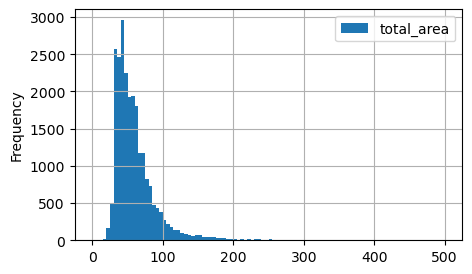

In [22]:
#изучим общую площадь
data['total_area'].unique()
data.plot(y = 'total_area', kind = 'hist', bins = 100, grid=True, figsize = (5,3), range = (0,500))
data['total_area'].describe()
plt.show()

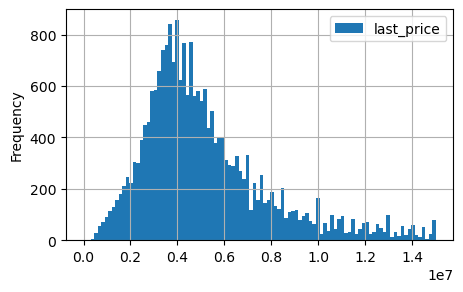

In [23]:
#изучим цену
data['last_price'].unique()
data.plot(y = 'last_price', kind = 'hist', bins = 100, grid=True, range = (0,15000000), figsize = (5,3))
data['last_price'].describe()
plt.show()

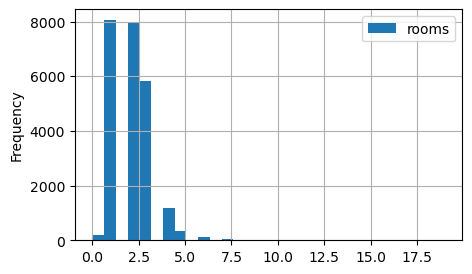

,living_area,total_area
rooms,,
0,18.865246,29.279746
1,17.893552,37.644669
2,31.736849,55.855089
3,47.387941,77.764580
4,66.983223,107.610763
5,100.009247,161.474816
6,130.983636,201.537619
7,163.564151,265.325424
8,168.683333,259.233333


In [24]:

#изучим число комнат

data['rooms'].unique()
data.plot(y = 'rooms', kind = 'hist', bins = 30, grid=True, figsize = (5,3))
data['rooms'].describe()
plt.show()
data.pivot_table(index=['rooms'], values=['total_area', 'living_area']) 
#с данными все впорядке

**Вывод** 

Высота потолков: В ходе исследования, на мой взгляд, самым крритичным было - ошибка в данных с высотой потолка. В остальных столбцах были выбивающиеся значения. 

Общая площадь: распределение данных нормальное, есть выбросы но они не сильно влияют на данные, 
с помошью describe получил общее представление

Цена: Цены на недвижимость имеют среднее значение в 6,5 млн руб., медиана 4,6 млн руб.

Число комнат: Количество комнат колеблется от 1 до 19. Больше всего однокомнатных квартир. Значение 0 комнат, возможно, присваивалось квартирам-студиям, судя по их общей площади.

### Посчитайте и добавьте в таблицу новые столбцы

In [25]:
#цена одного квадратного метра
data['one_meter_price'] = data['last_price']/data['total_area']
data['day_public'] = data['last_price']/data['total_area']


In [26]:
#день недели публикации
data['weekday'] = data['first_day_exposition'].dt.weekday


In [27]:
#месяц публикации объявления
data['month'] = pd.DatetimeIndex(data['first_day_exposition']).month


In [28]:
#год публикации объявления
data['year'] = pd.DatetimeIndex(data['first_day_exposition']).year


In [29]:
#тип этажа квартиры (значения — «первый», «последний», «другой»); = data.loc[data['floor'] == '1', 'type_floor'] = 'первый'
def type_floor(row):
    a=row['floor']
    b=row['floors_total']
    try:
        if a==1:
            return 'первый'
        elif a==b:
            return 'последний'
        else:
            return 'другой'
    except:
            return 'этаж не указан'
data['type_floor'] = data.apply(type_floor, axis=1)
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around_3000,ponds_nearest,days_exposition,type_living,one_meter_price,day_public,weekday,month,year,type_floor
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.0,8,NaN,...,2.0,755.0,NaN,меньше,120370.370370,120370.370370,3,3,2019,другой
1,7,3350000.0,40.40,2018-12-04,1,2.65,11.0,18.6,1,NaN,...,0.0,NaN,81.0,меньше,82920.792079,82920.792079,1,12,2018,первый
2,10,5196000.0,56.00,2015-08-20,2,2.65,5.0,34.3,4,NaN,...,2.0,574.0,558.0,меньше,92785.714286,92785.714286,3,8,2015,другой
3,0,64900000.0,159.00,2015-07-24,3,2.65,14.0,NaN,9,NaN,...,3.0,234.0,424.0,None,408176.100629,408176.100629,4,7,2015,другой
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.0,13,NaN,...,1.0,48.0,121.0,меньше,100000.000000,100000.000000,1,6,2018,другой
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5.0,73.3,3,NaN,...,3.0,381.0,NaN,меньше,72490.845228,72490.845228,1,3,2017,другой
23695,14,3100000.0,59.00,2018-01-15,3,2.65,5.0,38.0,4,NaN,...,NaN,NaN,45.0,меньше,52542.372881,52542.372881,0,1,2018,другой
23696,18,2500000.0,56.70,2018-02-11,2,2.65,3.0,29.7,1,NaN,...,NaN,NaN,NaN,None,44091.710758,44091.710758,6,2,2018,первый
23697,13,11475000.0,76.75,2017-03-28,2,3.00,17.0,NaN,12,NaN,...,3.0,196.0,602.0,None,149511.400651,149511.400651,1,3,2017,другой


In [30]:
#расстояние до центра города в километрах (переведите из м в км и округлите до целых значений)
data['city_centers_nearest_km'] = round(data['city_centers_nearest']/1000)


### Проведите исследовательский анализ данных

**4.1. Изучение параметров объектов:**

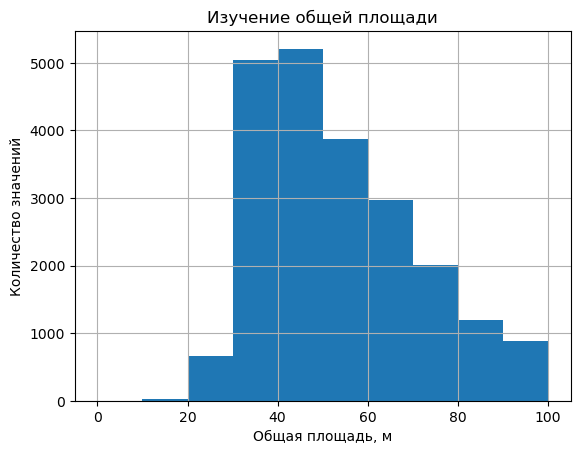

In [31]:
#общая площадь total_area


def total_area_name(row):
    y=row['total_area']
    try:
        if y <= 30:
            return 'Площадь меньше 30'
        elif 31 <= y <= 65:
            return 'Площадь 31-65'
        else:
            return 'Площадь больше 65'
    except:
        return 'нет данных'
data['total_area_name'] = data.apply(total_area_name, axis=1)

total_area_stat = data.pivot_table(index='total_area_name', values='total_area')
total_area_stat

#total_area_stat.plot(y=('total_area'), kind='bar', title='Общая площадь')
#total_area_stat.plot(kind='hist', title='Общая площадь')
#data.info()
a = data.groupby('total_area_name')['total_area'].count()

b = data['total_area'].hist(bins=10, range=(0, 100))
plt.title('Изучение общей площади')
plt.xlabel('Общая площадь, м')
plt.ylabel('Количество значений')
plt.show()
#print(a)
#print()
#print(b)



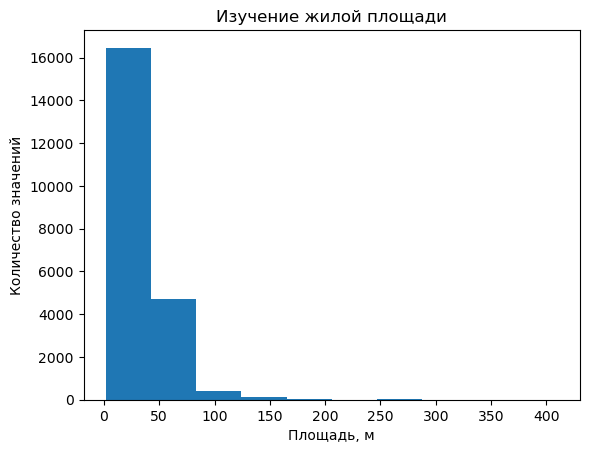

In [32]:
#жилая площадь 
data['living_area'].plot(kind='hist', title='Жилая площадь')
plt.title('Изучение жилой площади')
plt.xlabel('Площадь, м')
plt.ylabel('Количество значений')
plt.show()

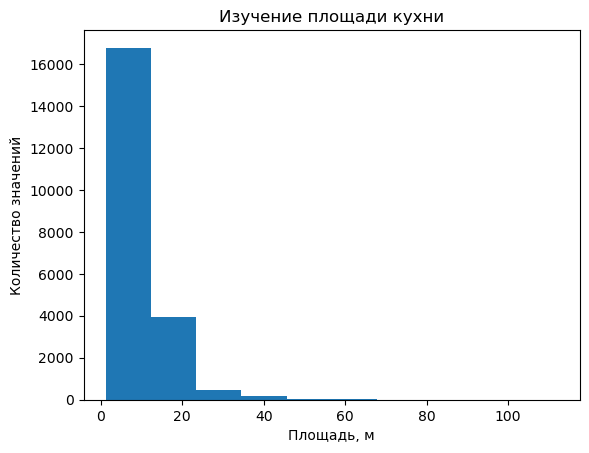

In [33]:
#площадь кухни kitchen_area 
data['kitchen_area'].plot(kind='hist', title='Жилая площадь')
plt.title('Изучение площади кухни')
plt.xlabel('Площадь, м')
plt.ylabel('Количество значений')
plt.show()

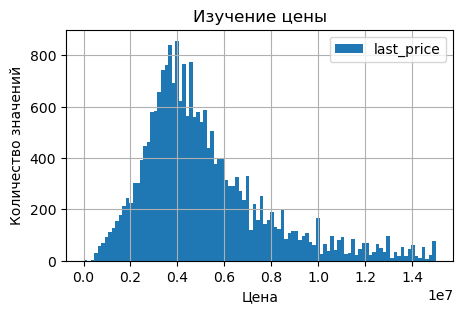

In [34]:
#цена объекта last_price 
data['last_price_mln'] = data['last_price']/1000000
data.plot(y = 'last_price', kind = 'hist', bins = 100, grid=True, range = (0,15000000), figsize = (5,3))
plt.title('Изучение цены')
plt.xlabel('Цена')
plt.ylabel('Количество значений')
plt.show()
#data.hist('last_price_mln', bins=10, figsize=(12,6), grid=True, range=(0, 40))
#data.hist('last_price_mln', bins=10, figsize=(12,6), grid=True, range=(40, 300))

#data['new_2'] = data.groupby('year')['last_price_min'].min()
#data['new_2'] 

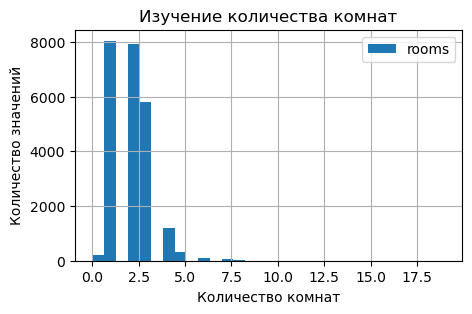

In [35]:
#количество комнат rooms Самое часто встречающееся жилье - с одной, двумя и чуть реже тремя комнатами.
data.plot(y = 'rooms', kind = 'hist', bins = 30, grid=True, figsize = (5,3))
plt.title('Изучение количества комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Количество значений')
plt.show()
#data.hist('rooms', bins=10, figsize=(12,6), grid=True, range=(0, 8))
#data.hist('rooms', bins=10, figsize=(12,6), grid=True, range=(8, 20))

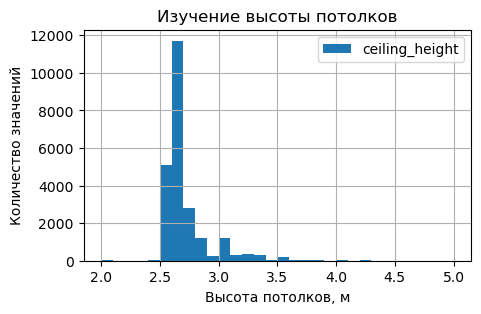

In [36]:
#высота потолков ceiling_height 
data.plot(y = 'ceiling_height', kind = 'hist', bins = 30, range = (2,5), grid=True, figsize = (5,3))
plt.title('Изучение высоты потолков')
plt.xlabel('Высота потолков, м')
plt.ylabel('Количество значений')
plt.show()
#data.hist('ceiling_height', bins=10, figsize=(12,6), grid=True, range=(0, 4))
#data.hist('ceiling_height', bins=10, figsize=(12,6), grid=True, range=(4, 12))


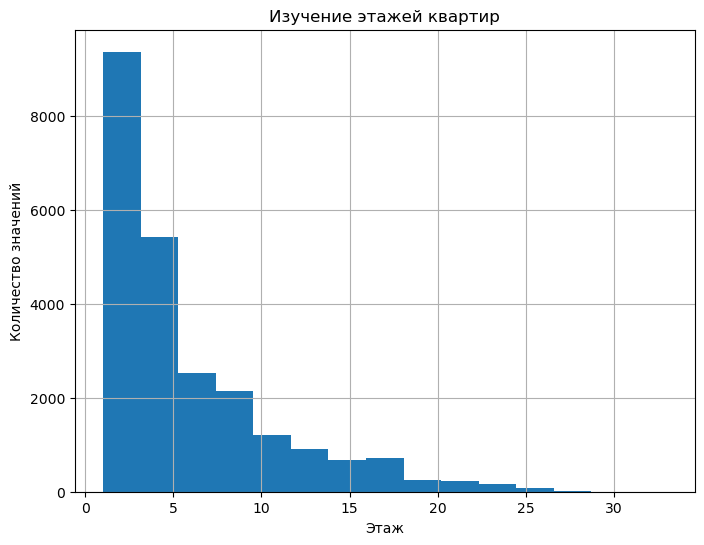

In [37]:
#этаж квартиры floor 
data.hist('floor', bins=15, figsize=(8, 6), grid=True)
plt.title('Изучение этажей квартир')
plt.xlabel('Этаж')
plt.ylabel('Количество значений')
plt.show()

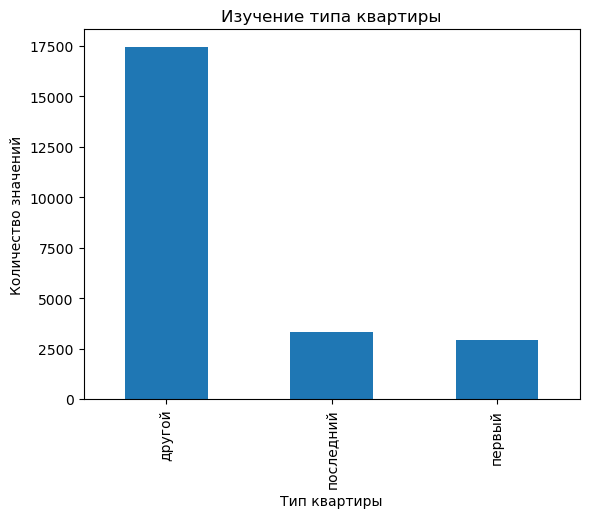

In [38]:
#тип этажа квартиры («первый», «последний», «другой») type_floor 
data['type_floor'].value_counts().plot.bar()

plt.title('Изучение типа квартиры')
plt.xlabel('Тип квартиры')
plt.ylabel('Количество значений')
plt.show()



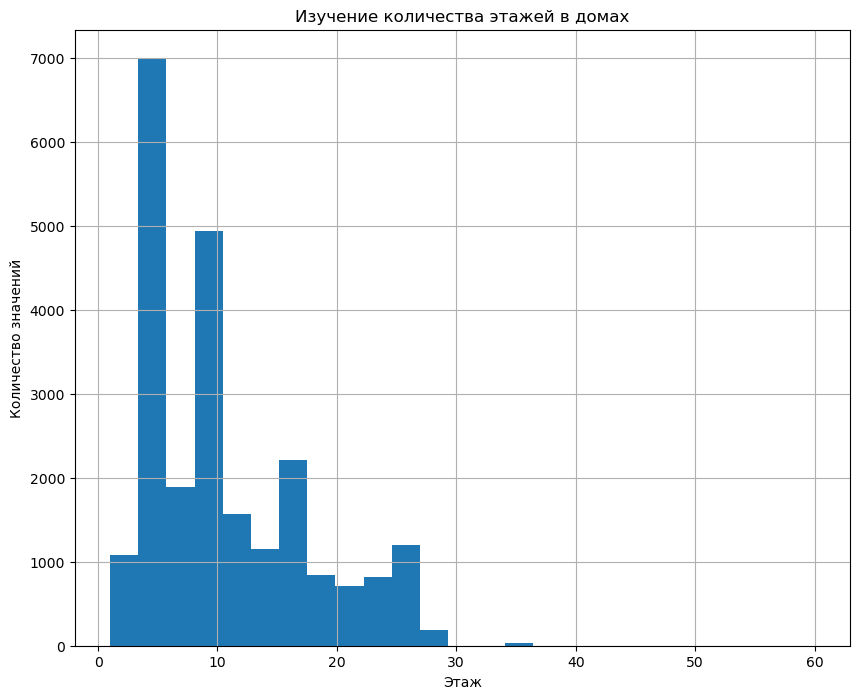

array([16., 11.,  5., 14., 12., 26., 24., 27.,  9.,  6., 17., 25.,  3.,
       23., 19., 18.,  4., 22.,  8.,  2., 10.,  7., 13., 15., nan, 20.,
       28., 36., 21., 35., 34., 60.,  1., 29., 33., 52., 37.])

In [39]:
#общее количество этажей в доме floors_total 
data.hist('floors_total', bins=25, figsize=(10, 8), grid=True)
plt.title('Изучение количества этажей в домах')
plt.xlabel('Этаж')
plt.ylabel('Количество значений')
plt.show()
data['floors_total'].unique()

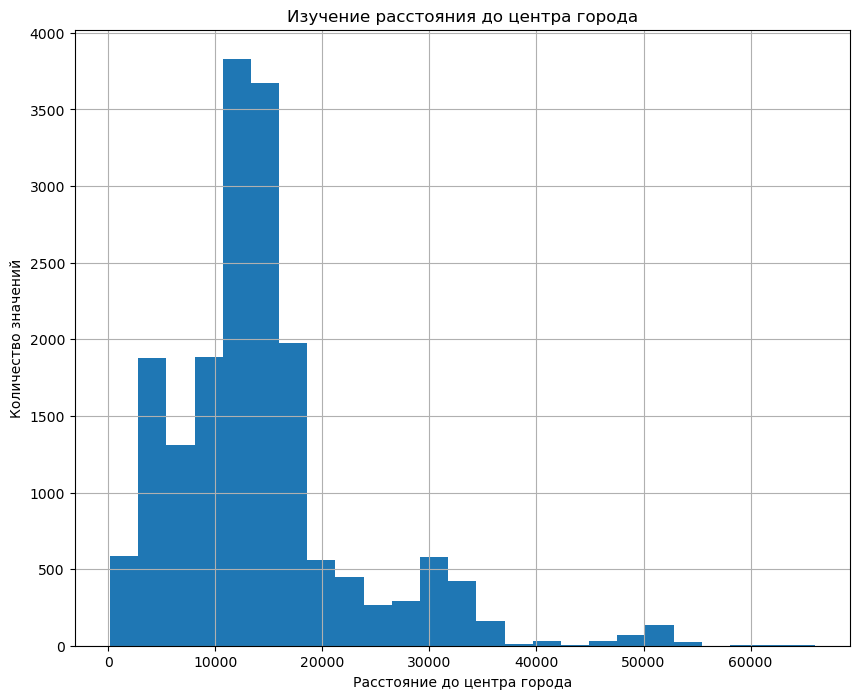

In [40]:
#расстояние до центра города в метрах city_centers_nearest 
data.hist('city_centers_nearest', bins=25, figsize=(10, 8), grid=True)
plt.title('Изучение расстояния до центра города')
plt.xlabel('Расстояние до центра города')
plt.ylabel('Количество значений')
plt.show()

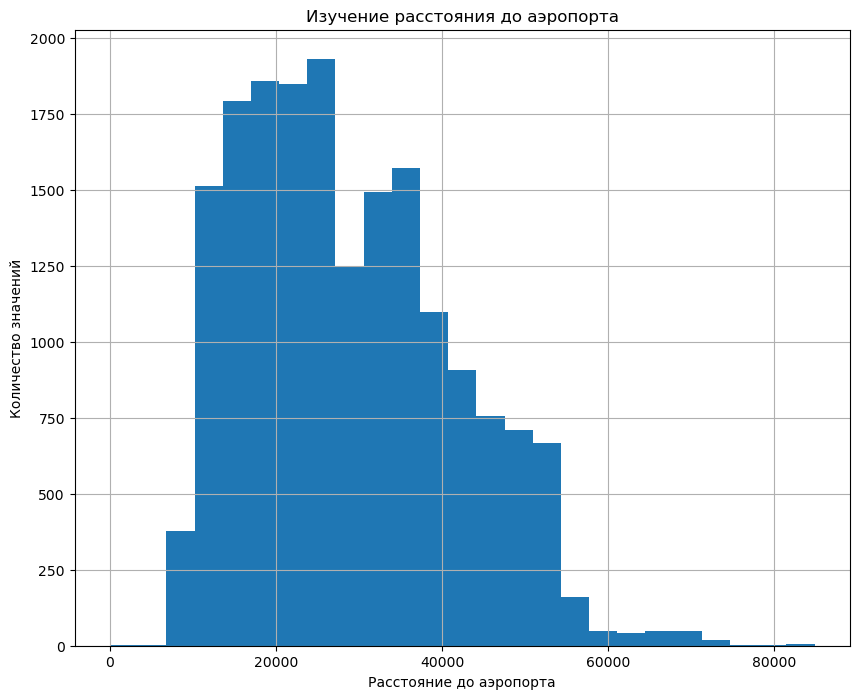

In [41]:
#расстояние до ближайшего аэропорта airports_nearest 
data.hist('airports_nearest', bins=25, figsize=(10, 8), grid=True)
plt.title('Изучение расстояния до аэропорта')
plt.xlabel('Расстояние до аэропорта')
plt.ylabel('Количество значений')
plt.show()

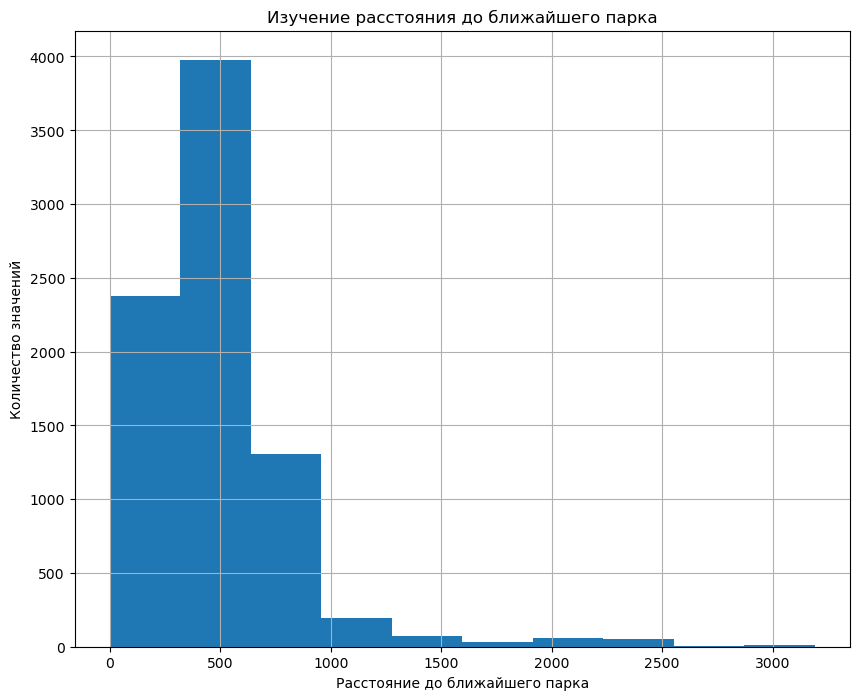

In [42]:
#расстояние до ближайшего парка parks_nearest 
data.hist('parks_nearest', bins=10, figsize=(10, 8), grid=True)
plt.title('Изучение расстояния до ближайшего парка')
plt.xlabel('Расстояние до ближайшего парка')
plt.ylabel('Количество значений')
plt.show()

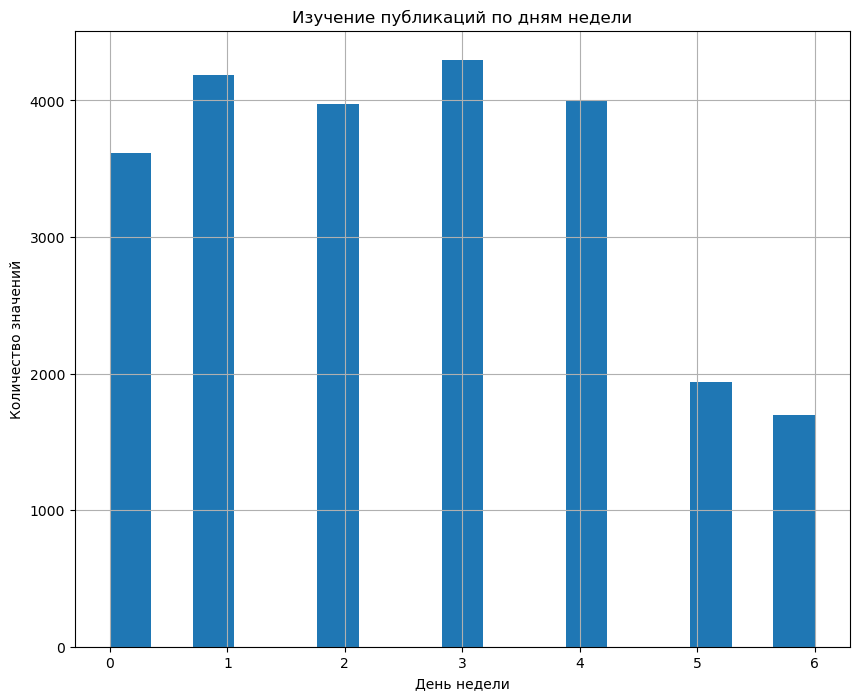

In [43]:
#день публикации объявления weekday 
data.hist('weekday', bins=17, figsize=(10, 8), grid=True)
plt.title('Изучение публикаций по дням недели')
plt.xlabel('День недели')
plt.ylabel('Количество значений')
plt.show()

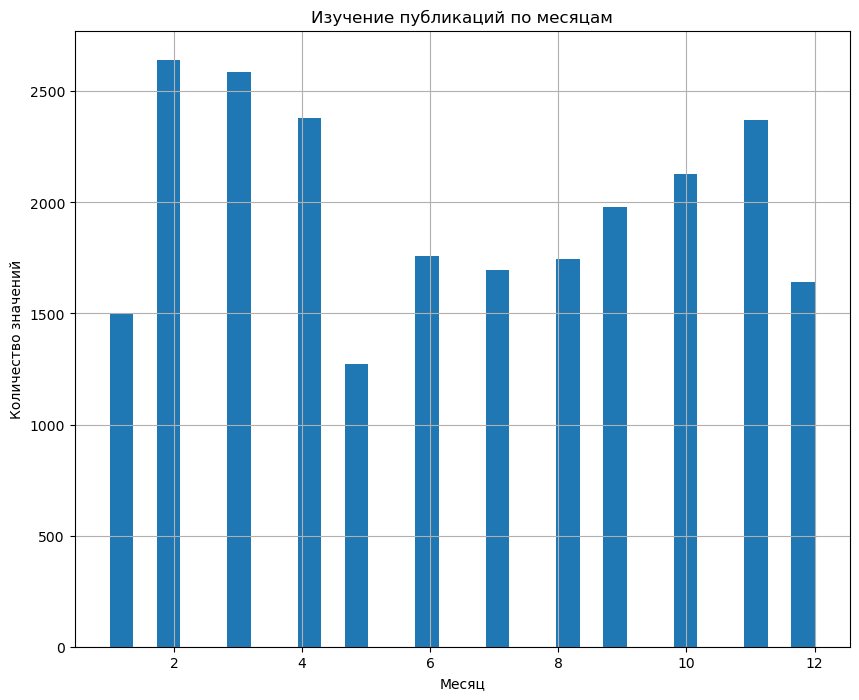

In [44]:
#месяц публикации объявления month 
data.hist('month', bins=30, figsize=(10, 8), grid=True)
plt.title('Изучение публикаций по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Количество значений')
plt.show()

**Вывод. Наблюдения по параметрам в гистограммах** 

- общая площадь total_area. На графике видно, что самой большой группой являются средние знаяения общей площади, которые входят в значения диапазона от 31 м до 65 м.

- жилая площадь Самое распространенное и часто встречающееся жилье - с наименьшей жилой площадью.

- площадь кухни kitchen_area По графику видно, что кухни с наименьшей площадью преобладают, что хорошо коррелирует с общей жилой площадью.

- цена объекта last_price В данном случае наиболее часто встречается цена в диапазоне от 4 до 8 миллионов

- количество комнат rooms Самое часто встречающееся жилье - с одной, двумя и чуть реже тремя комнатами.

- высота потолков ceiling_height. По графикам можно сделать вывод, что чаще всего встречаются потолки стандартных размеров 1.9-2.9 м. Выпадающие значения удалять не целесообразно, так как в данных есть дома, площадью 300м, где возможны потолки с большими значениями (например, такие потолки могут быть в бассейне или зале). Может быть, эта информация понадобится в дальнейшем исследовании.

- этаж квартиры floor. Чаще всего выставляются на продажи квартиры на 1-4 этажах

- тип этажа квартиры («первый», «последний», «другой») type_floor. Квартир с параметром не первый и не последний этаж больше всего, что видно на графике.

- общее количество этажей в доме floors_total. Наибольшее количество квартир выставлено в домах с этажностью до 5 этажей, а так же 9-10 этажей. В домах с этажами более 28 выставлено немного квартир.

- расстояние до центра города в метрах city_centers_nearest. Наибольшая часть домов на продажу расположена в радиусе 12 км от центра города.

- расстояние до ближайшего аэропорта airports_nearest. На графике выделяются четыре группы: 1 - находится до 25 км до аэропорта (можно предположить, что группы делятся 1.город 2. пригород 3.областные центры/область 4. сёла и посёлки), 2 - 30-39 км, 3 - 39-55 км, 4 - выше 55 км.

- расстояние до ближайшего парка parks_nearest. Самая большая группа значений выделяется в радиусе 0,5 км.

- день публикации объявления weekday. Больше всего публикаций было сделано во вт и чт.

- месяц публикации объявления month. Две самые большие группы - это февраль, март и апрель, ноябрь.


**4.2. Изучение, как быстро продавались квартиры (столбец days_exposition)**

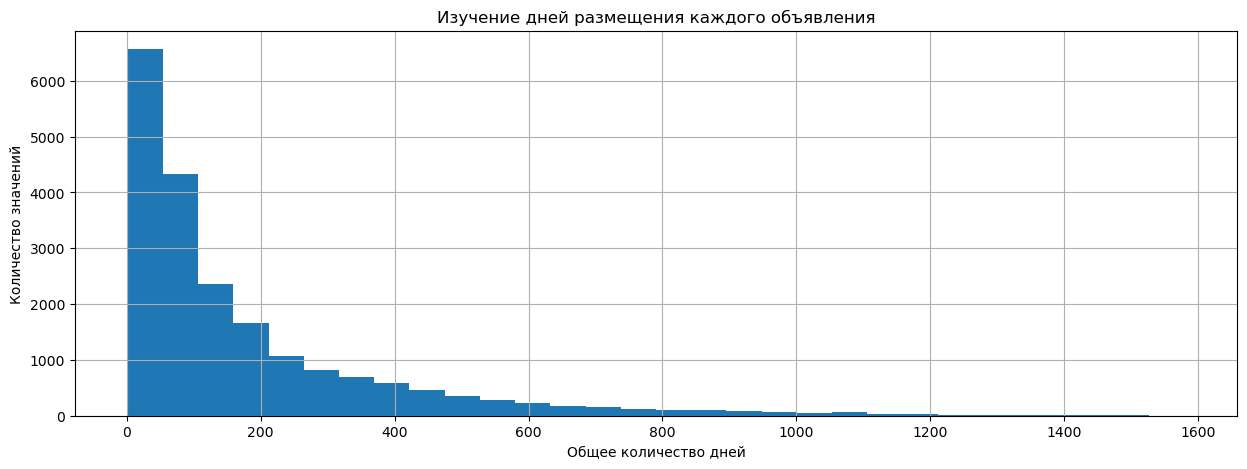

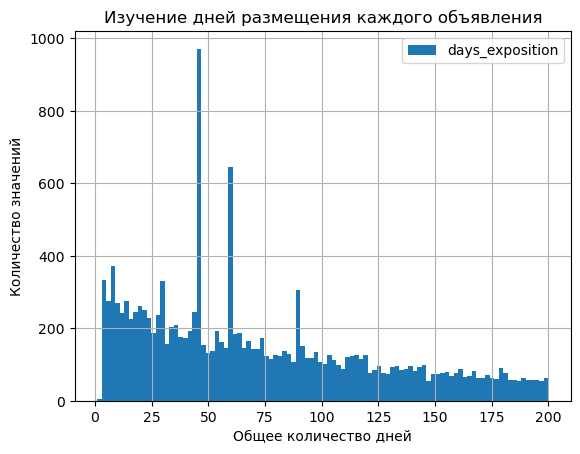

In [45]:
#days_exposition Этот параметр показывает, сколько дней было размещено каждое объявление. 

days_exp_median = data.groupby('total_area_name')['days_exposition'].median()*100
days_exp_new = data.pivot_table(index=['total_area_name'], values=['days_exposition'], aggfunc=['mean', 'median'], margins=True) 

data['days_exposition'].hist(bins=30, figsize=(15,5))
plt.title('Изучение дней размещения каждого объявления')
plt.xlabel('Общее количество дней')
plt.ylabel('Количество значений')
plt.show()

data['days_exposition'].describe()
data['days_exposition'].value_counts()

data.plot(y = 'days_exposition', kind = 'hist', bins = 100, grid = True, range = (1,200))
plt.title('Изучение дней размещения каждого объявления')
plt.xlabel('Общее количество дней')
plt.ylabel('Количество значений')
plt.show()

**Вывод**

 Среднее значение - 180 дней, а медиана - 95 дней. Сделав гистограмму со значениями от 0 до 200 с кол-вом корзин 100, обнаружили выбивающиеся значения и методом value_counts убедились в этом - у нас аномалии на 45, 60, 7, 30, 90 днях - это наиболее популярное количество дней до снятия объявления. Это может быть связано с продажей объекта, а так же с особенностями сроков расмещения объекта на ресурсе.

**4.3. Зависит ли цена от:**

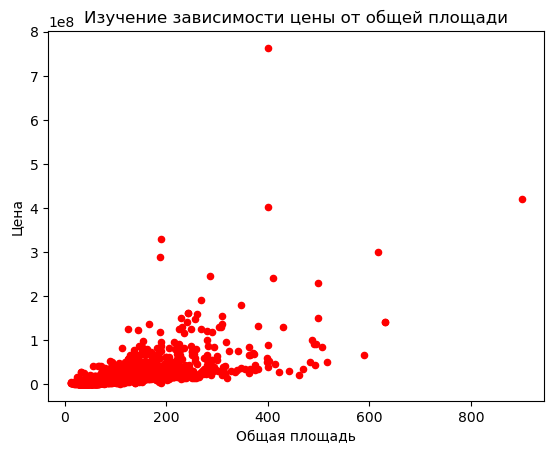

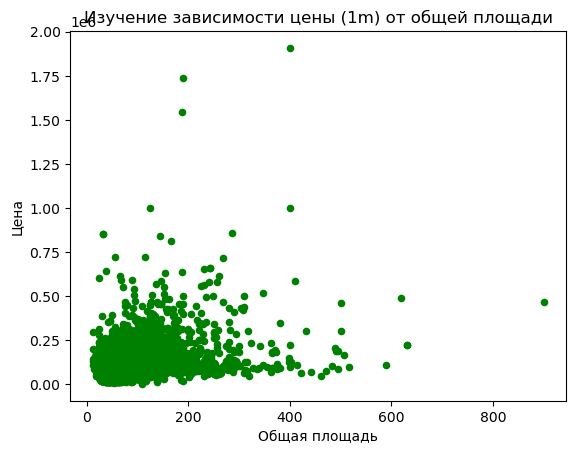

In [46]:
#общей площади total_area
total_area_medi = data.groupby('total_area_name')['last_price_mln'].median()
total_area_pivot = data.pivot_table(index=['total_area_name'], values=['last_price_mln'], aggfunc=['mean', 'median', 'count'], margins=True)

#sns.barplot(x=total_area_medi.index, y=total_area_medi, color='red').set(title='Диаграмма зависимости')
data.plot(y='last_price', x='total_area', kind='scatter', color='red')
plt.title('Изучение зависимости цены от общей площади')
plt.xlabel('Общая площадь')
plt.ylabel('Цена')
plt.show()

data.plot(y='one_meter_price', x='total_area', kind='scatter', color='green')
plt.title('Изучение зависимости цены (1m) от общей площади')
plt.xlabel('Общая площадь')
plt.ylabel('Цена')
plt.show()



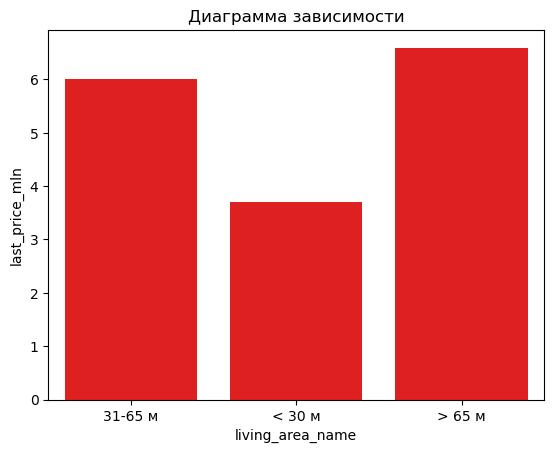

In [47]:
#жилой площади living_area
def living_area_name(row):
    y=row['living_area']
    try:
        if y <= 30:
            return '< 30 м'
        elif 31 <= y <= 65:
            return '31-65 м'
        else:
            return '> 65 м'
    except:
        return 'нет данных'
data['living_area_name'] = data.apply(living_area_name, axis=1)
data['living_area_name']

living_area_median = data.groupby('living_area_name')['last_price_mln'].median()
living_area_new = data.pivot_table(index=['living_area_name'], values=['last_price_mln'], aggfunc=['mean', 'median'])
living_area_new


sns.barplot(x=living_area_median.index, y=living_area_median, color='red').set(title='Диаграмма зависимости')
plt.show()



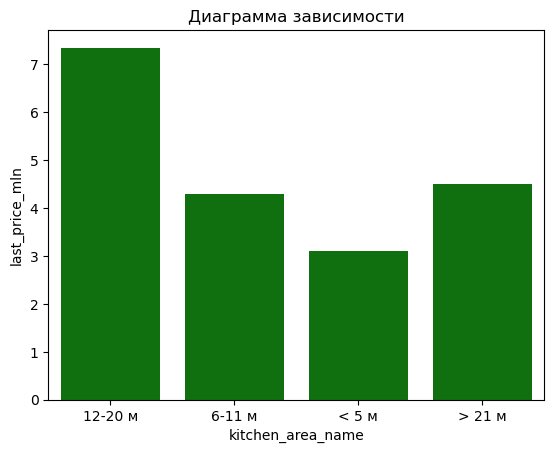

In [48]:
#площади кухни kitchen_area
def kitchen_area_name(row):
    y=row['kitchen_area']
    try:
        if y <= 5:
            return '< 5 м'
        elif 6 <= y <= 11:
            return '6-11 м'
        elif 12 <= y <= 20:
            return '12-20 м'
        else:
            return '> 21 м'
    except:
        return 'нет данных'
data['kitchen_area_name'] = data.apply(kitchen_area_name, axis=1)
data['kitchen_area_name']


kitchen_area_median = data.groupby('kitchen_area_name')['last_price_mln'].median()
living_area_new = data.pivot_table(index=['kitchen_area_name'], values=['last_price_mln'], aggfunc=['mean', 'median'])
living_area_new
sns.barplot(x=kitchen_area_median.index, y=kitchen_area_median, color='green').set(title='Диаграмма зависимости')
plt.show()

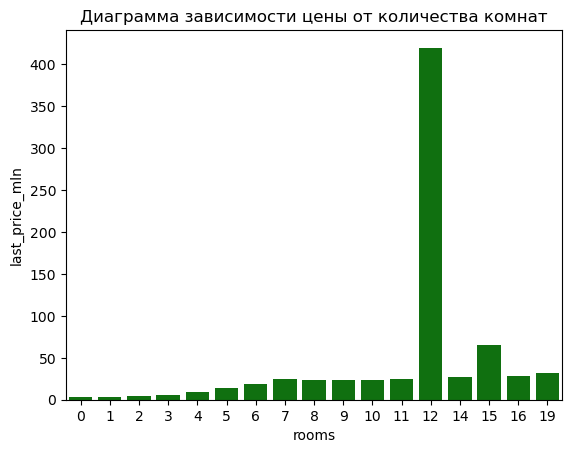

In [49]:
#количества комнат rooms

rooms_median = data.groupby('rooms')['last_price_mln'].median()
rooms_pivot = data.pivot_table(index=['rooms'], values=['last_price_mln'], aggfunc=['median'])

sns.barplot(x=rooms_median.index, y=rooms_median, color='green').set(title='Диаграмма зависимости цены от количества комнат') 
plt.show()

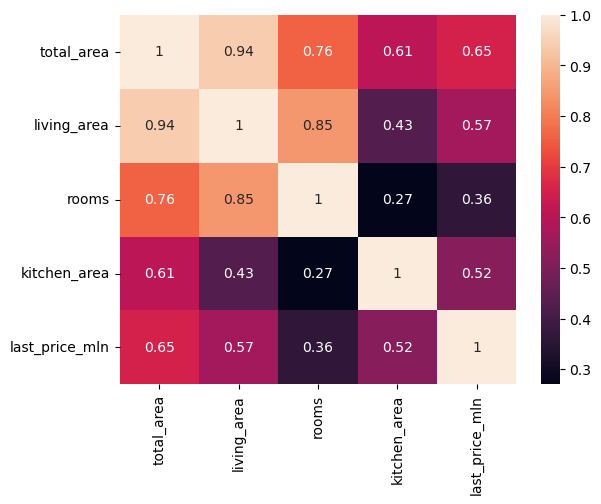

In [50]:
#data[['total_area', 'living_area', 'rooms', 'kitchen_area']].corr() 
data_corr = pd.DataFrame(data,columns=['total_area','living_area','rooms', 'kitchen_area', 'last_price_mln'])

corrMatrix = data_corr.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()


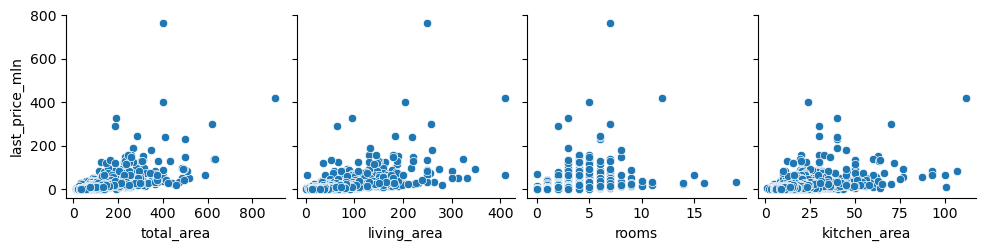

In [51]:
sns.pairplot(
    data_corr,
    x_vars=['total_area','living_area','rooms', 'kitchen_area'],
    y_vars=["last_price_mln"],
)
plt.show()

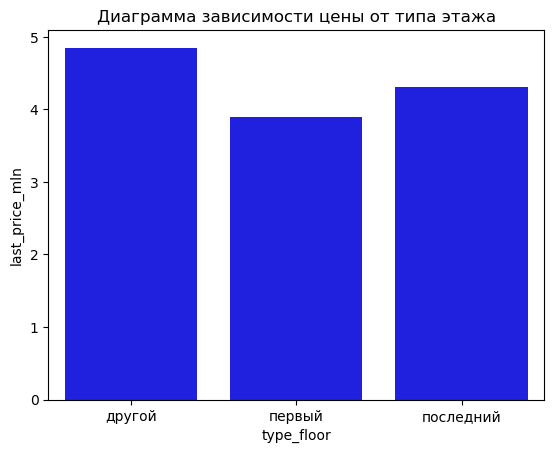

In [52]:
#этажа, на котором расположена квартира (первый, последний, другой)
type_floor_median = data.groupby('type_floor')['last_price_mln'].median()

type_floor_pivot = data.pivot_table(index=['type_floor'], values=['last_price_mln'], aggfunc=['median'])

sns.barplot(x=type_floor_median.index, y=type_floor_median, color='blue').set(title='Диаграмма зависимости цены от типа этажа') 
plt.show()

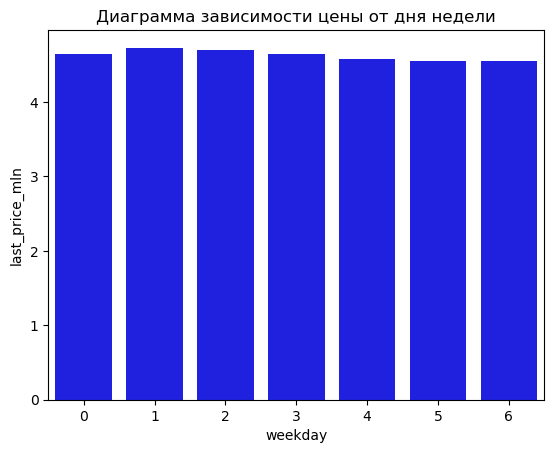

In [53]:
#даты размещения (день недели) weekday 
weekday_median = data.groupby('weekday')['last_price_mln'].median()

weekday_pivot = data.pivot_table(index=['weekday'], values=['last_price_mln'], aggfunc=['median', 'count', 'mean'])

sns.barplot(x=weekday_median.index, y=weekday_median, color='blue').set(title='Диаграмма зависимости цены от дня недели') 

plt.show()

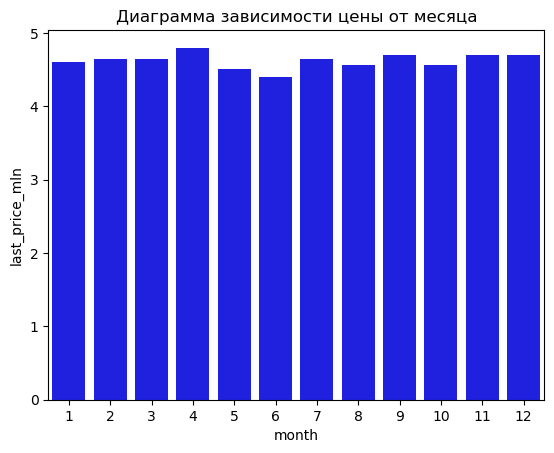

In [54]:
#даты размещения ( месяц) month
month_median = data.groupby('month')['last_price_mln'].median()

month_pivot = data.pivot_table(index=['month'], values=['last_price_mln'], aggfunc=['median', 'count', 'mean'])

sns.barplot(x=month_median.index, y=month_median, color='blue').set(title='Диаграмма зависимости цены от месяца') 
plt.show()

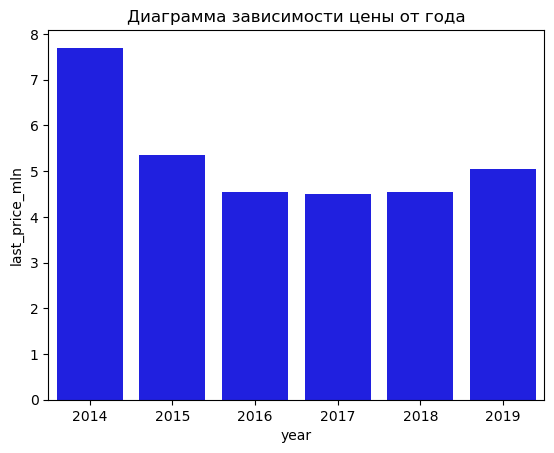

In [55]:
#даты размещения (год) year
year_median = data.groupby('year')['last_price_mln'].median()

year_pivot = data.pivot_table(index=['year'], values=['last_price_mln'], aggfunc=['median', 'count', 'mean'])

sns.barplot(x=year_median.index, y=year_median, color='blue').set(title='Диаграмма зависимости цены от года')
plt.show()



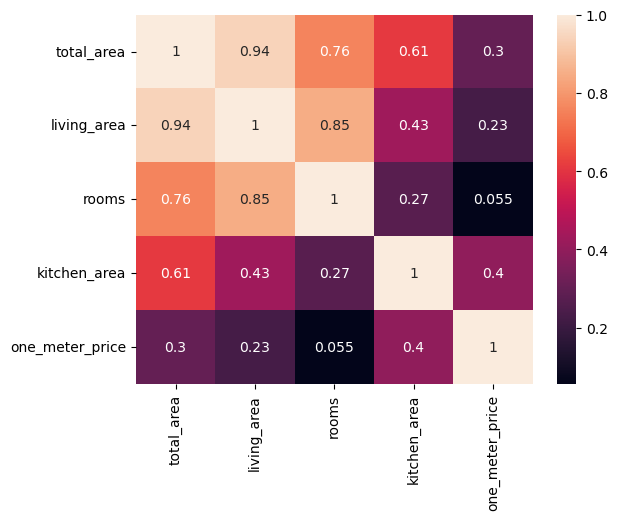

In [56]:
data_corr = pd.DataFrame(data,columns=['total_area','living_area','rooms', 'kitchen_area', 'one_meter_price'])

corrMatrix = data_corr.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()


<div class="alert alert-success">
<h2> Комментарий ревьюера #2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
        
Плюсую за использование heatmap и включения ее результатов в вывод.

**Вывод**

По коэфициенту корреляции Пирсона видно, что наиболее тесная связь зависисмости цены от общей площади и жилой, наименьшая связь прослеживается с количеством комнат. Стоимость 1 м2 наиболлее зависит от площади кухни и меньше всего от количества комнат. 

*Цена зависит от таких параметров как:* 

-Общая площадь помещений

-Жилая площадь

-Площадь кухни

-В основном, цена равномерно возрастает от количества комнат. 

-Как правило, цена на первом этаже обычно ниже. Видна зависимость цены от типа этажа.

-Прослеживается зависимость цены от года. Самая высокая цена была в 2014 году.


*Цена практически не зависит от:*


-Дня недели.

-От месяца.

**4.4. Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений**

In [57]:
#top_10 = data['locality_name'].value_counts().sort_values(ascending=False) # Топ-10 населенных пунктов
locality_pivot = data.pivot_table(index = 'locality_name', values = 'one_meter_price', aggfunc=['count', 'mean'])
locality_pivot.columns = ['count', 'mean']
locality_pivot = locality_pivot.sort_values('count', ascending = False).head(10)
print(locality_pivot)

locality_pivot[locality_pivot['mean']==locality_pivot['mean'].max()] #самая высокая стоимость
locality_pivot[locality_pivot['mean']==locality_pivot['mean'].min()] #самая низкая стоимость

                   count           mean
locality_name                          
Санкт-Петербург    15721  114849.008794
посёлок Мурино       522   85752.189195
посёлок Шушары       440   78677.364217
Всеволожск           398   68654.473986
Пушкин               369  103125.819291
Колпино              338   75424.579098
посёлок Парголово    327   90175.913458
Гатчина              307   68746.146763
деревня Кудрово      299   92473.547576
Выборг               237   58141.909153


,count,mean
locality_name,,
Выборг,237,58141.909153


**Вывод** 

Самая высокая цена и самое большое количество из объявлений в Санкт-Петербурге, а самое мальнькое значение этих параметров в Выборге.

**Вывод**

Средняя стоимость каждого километра распределено неравномерно, что может указывать на другие факторы влияющие на стоимость (например, микрорайон, инфраструктура, новизна домов и тд). Но, в целом, есть закономерность, что чем дальше от центра города, тем километр дешевле.

**Общий вывод**


**Шаг 2. Предобработка данных**

Причины пропусков могут быть если: 
1)не указаны какие-нибудь сведения из-за нехватки информации 
2)в самой системе какие-либо неполадки, дала сбой 
3)в некоторых средах есть автозаполнение, оно не сработало


Высота потолков: В ходе исследования, на мой взгляд, самым крритичным было - ошибка в данных с высотой потолка. В остальных столбцах были выбивающиеся значения. 

Общая площадь: распределение данных нормальное, есть выбросы но они не сильно влияют на данные, 
с помошью describe получил общее представление

Цена: Цены на недвижимость имеют среднее значение в 6,5 млн руб., медиана 4,6 млн руб.

Число комнат: Количество комнат колеблется от 1 до 19. Больше всего однокомнатных квартир. Значение 0 комнат, возможно, присваивалось квартирам-студиям, судя по их общей площади.

**Шаг 4. Проведите исследовательский анализ данных:**

**4.1. Вывод. Наблюдения по параметрам в гистограммах**

- общая площадь total_area На графике видно, что самой большой группой являются средние значения общей площади, которые входят в значения диапазона от 31 м до 65 м.

- жилая площадь Самое распространенное и часто встречающееся жилье - с наименьшей жилой площадью.

- площадь кухни kitchen_area По графику видно, что кухни с наименьшей площадью преобладают, что хорошо коррелирует с общей жилой площадью.

- цена объекта last_price В данном случае наиболее часто встречается цена в диапазоне от 4 до 8 миллионов

- количество комнат rooms Самое часто встречающееся жилье - с одной, двумя и чуть реже тремя комнатами.

- высота потолков ceiling_height По графикам можно сделать вывод, что чаще всего встречаются потолки стандартных размеров 1.9-2.9 м. Выпадающие значения удалять не целесообразно, так как в данных есть дома, площадью 300м, где возможны потолки с большими значениями (например, такие потолки могут быть в бассейне или зале). Может быть, эта информация понадобится в дальнейшем исследовании.

- этаж квартиры floor Чаще всего выставляются на продажи квартиры на 1-4 этажах

- тип этажа квартиры («первый», «последний», «другой») type_floor Квартир с параметром не первый и не последний этаж больше всего, что видно на графике.

- общее количество этажей в доме floors_total Наибольшее количество квартир выставлено в домах с этажностью до 5 этажей, а так же 9-10 этажей. В домах с этажами более 28 выставлено немного квартир.

- расстояние до центра города в метрах city_centers_nearest Наибольшая часть домов на продажу расположена в радиусе 12 км от центра города.

- расстояние до ближайшего аэропорта airports_nearest На графике выделяются четыре группы: 1 - находится до 25 км до аэропорта (можно предположить, что группы делятся 1.город 2. пригород 3.областные центры/область 4. сёла и посёлки), 2 - 30-39 км, 3 - 39-55 км, 4 - выше 55 км.

- расстояние до ближайшего парка parks_nearest Самая большая группа значений выделяется в радиусе 0,5 км.

- день публикации объявления weekday Больше всего публикаций было сделано во вт и чт.

- месяц публикации объявления month Две самые большие группы - это февраль, март и апрель, ноябрь.

**4.2. Изучение, как быстро продавались квартиры (столбец days_exposition)**

Среднее значение - 180 дней, а медиана - 95 дней. Сделав гистограмму со значениями от 0 до 200 с кол-вом корзин 100, обнаружили выбивающиеся значения и методом value_counts убедились в этом - у нас аномалии на 45, 60, 7, 30, 90 днях - это наиболее популярное количество дней до снятия объявления. Это может быть связано с продажей объекта, а так же с особенностями сроков расмещения объекта на ресурсе.

**4.3. Зависит ли цена от:**

По коэфициенту корреляции Пирсона видно, что наиболее тесная связь зависисмости цены от общей площади и жилой, наименьшая связь прослеживается с количеством комнат. 

Цена зависит от таких параметров как:

-Общая площадь помещений

-Жилая площадь

-Площадь кухни

-В основном, цена равномерно возрастает от количества комнат.

-Как правило, цена на первом этаже обычно ниже. Видна зависимость цены от типа этажа.

-Прослеживается зависимость цены от года. Самая высокая цена была в 2014 году.

Цена практически не зависит от:

-Дня недели.

-От месяца.

**4.4. Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений**

Самая высокая цена и самое большое количество из объявлений в Санкт-Петербурге, а самое маленькое значение этих параметров в Выборге.

**4.5. выделите квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислите среднюю цену каждого километра.**

Средняя стоимость каждого километра распределено неравномерно, что может указывать на другие факторы влияющие на стоимость (например, микрорайон, инфраструктура, новизна домов и тд). Но, в целом, есть закономерность, что чем дальше от центра города, тем километр дешевле.
